In [1]:
import pandas as pd
import seaborn as sns
import sklearn  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [2]:
# Charger le dataset déjà nettoyé et normalisé
data = pd.read_csv("data/heart_disease_clean.csv")

In [3]:
# 🔹 Séparer X et y
X = data.drop("num", axis=1)
y = data["num"]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1)

In [5]:
X_train.shape

(272, 13)

In [6]:
X_test.shape

(31, 13)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

KNeighborsClassifier()

In [8]:
neigh.score(X_train, y_train) 

0.7132352941176471

In [9]:
neigh.score(X_test, y_test) 

0.6451612903225806

## Améliorons le modèle

In [10]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) 
    print(k, neigh.score(X_train, y_train)) 

1 1.0
2 0.75
3 0.7058823529411765
4 0.7389705882352942
5 0.7132352941176471
6 0.6764705882352942
7 0.6764705882352942
8 0.6764705882352942
9 0.6691176470588235
10 0.6617647058823529


In [11]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.655818
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.898522
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.173931
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.898522
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.898522


<Axes: ylabel='proportion'>

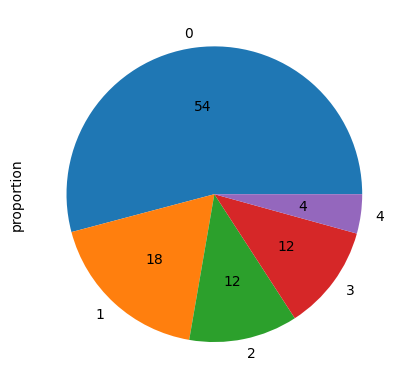

In [12]:
y.value_counts(normalize=True).plot(kind="pie",autopct='%.0f')

Ici les données sont déséquilibrées donc il faudra juste faire un modèle pour prédire si on est une personne malade ou saine.

In [13]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [14]:
y=y.apply(lambda x: 1 if x>=1 else 0)

<Axes: ylabel='proportion'>

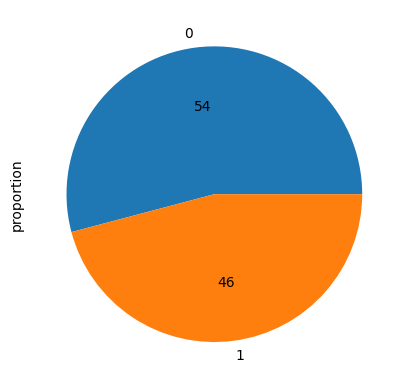

In [15]:
y.value_counts(normalize=True).plot(kind="pie",autopct='%.0f')

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1) 

In [17]:
# Entraînement de plusieurs modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Modèle": name,
        "AUC": round(auc, 3),
        "Précision": round(report["weighted avg"]["precision"], 3),
        "Recall": round(report["weighted avg"]["recall"], 3),
        "F1-score": round(report["weighted avg"]["f1-score"], 3)
    })

# Résumé dans un DataFrame
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False)
print("Résultats des modèles :")
display(results_df)

C:\Users\mouke\.conda\envs\notebook\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Résultats des modèles :


,Modèle,AUC,Précision,Recall,F1-score
0,Logistic Regression,0.947,0.945,0.935,0.936
3,Gradient Boosting,0.921,0.923,0.903,0.904
4,Support Vector Machine,0.921,0.923,0.903,0.904
5,Naive Bayes,0.906,0.906,0.903,0.904
1,Random Forest,0.895,0.903,0.871,0.873
2,AdaBoost,0.868,0.886,0.839,0.840
6,K-Nearest Neighbors,0.868,0.886,0.839,0.840
7,Decision Tree,0.811,0.817,0.806,0.809


In [18]:
# Sélection du meilleur modèle
best_model_name = results_df.iloc[0]["Modèle"]
best_model = models[best_model_name]
print(f"Meilleur modèle : {best_model_name} (AUC = {results_df.iloc[0]['AUC']})")

Meilleur modèle : Logistic Regression (AUC = 0.947)


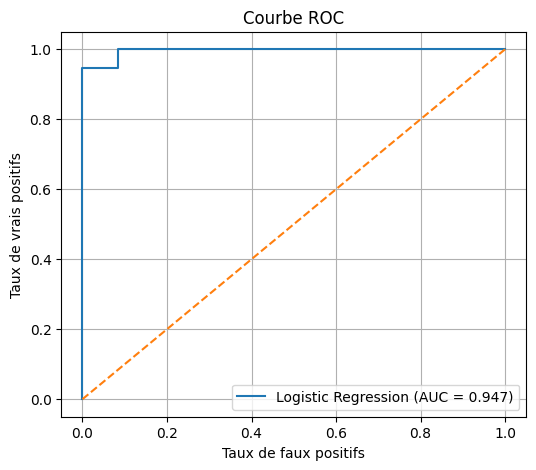

In [19]:
# Visualisation de la courbe ROC
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {results_df.iloc[0]["AUC"]})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

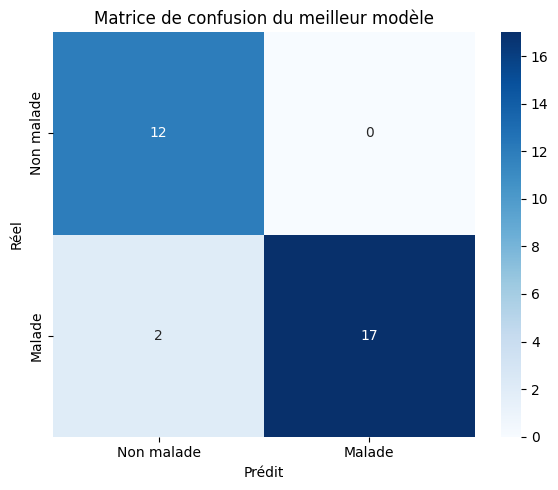

In [20]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non malade", "Malade"], yticklabels=["Non malade", "Malade"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion du meilleur modèle")
plt.tight_layout()
plt.show()

In [21]:
# Sauvegarde du modèle et du scaler
joblib.dump(best_model, "models/best_model.pkl")
print("Modèle sauvegardé dans models.")

Modèle sauvegardé dans models.
